# Lab Assignment One: Exploring Table Data
#### By Zhi Yang, Jiwen Zhou, Yang Sun, Huanfu Tong

## 1. Business Understanding
Bubbles refer to asset prices that exceed an asset’s fundamental value because current owners believe they can resell the asset at an even higher price. [1] Since the early 20th century, estate bubbles have burst for many times all around the world. The earliest verifiable real estate bubble was the Property Bubbles in Florida, the U.S., from 1923 to 1926 The frenzy in real estate investment triggered a major collapse of the Wall Street stock market and led to a worldwide economic crisis in the 1930s, which finally led to the outbreak of World War II. 

Bubbles are typically associated with dramatic asset price increases followed by a collapse. Bubbles arise if the price exceeds the asset’s fundamental value. This can occur if investors hold the asset because they believe that they can sell it at a higher price than some other investor even though the asset’s price exceeds its fundamental value. [1] The housing purchase especially in some metropolises, either as an investment or as a rigid demand, undoubtedly need careful analysis and thinking. A wise buyer or agent should approximately predict the trend of the housing price depending on changes within a period, so as to recognize a possible housing bubble and develop an appropriate purchase plan to avoid unnecessary losses. Furthermore, at a more specific level, we suppose that a young buyer, who prefers a newly-built house, would like to purchase a house with 2 bedrooms and 1 bathrooms, within a defined area, requiring a certain range of the building size. How much budget she or he should prepare? There are many similar questions just like which region are the best to buy in, which ones are value for money, and where is the expensive side of town.

As the real housing market is a huge model, if we want to recognize a housing bubble accurately, we still need to add a large number of data. Otherwise, the prediction will lose its meaning. Due to the limited data, our project will focus on helping buyers to find a favorable purchase plan, depending on some of specific requirements including the personal budget, the location, the number of rooms, the purchase method, the type and size, and the year the house was built, etc. For the future price movements, we could just make a rough conjecture.

The data sourcing from Kaggle.com is about the housing market of Melbourne. As the example, Melbourne is currently experiencing a housing bubble. These housing clearance data are collected from 03/09/2016 to 09/12/2017, including 21 different types of attributes and more than 30,000 instances.

In order to clearly show the relationship between these attributes and make predictions easy, we have performed a series of processes on the raw data and built several visualizations. After carefully examining the data, we tried to reduce its dimensionalities to simplify the whole model to make it better for understanding.

Dataset: Melbourne Housing Market

URL: https://www.kaggle.com/anthonypino/melbourne-housing-market

Question of interest: How to make a favorable housing purchase plan?


## 2. Data Understanding
### 2.1 Data Description
First of all, we need to have an overview of the dataset, which includes column names,  number of entries and datatypes; then take the top five rows of the table as an example to show.

In [2]:
import numpy as np
import pandas as pd

# Load all of data
rawdata = pd.read_csv('Mhousing.csv')

# Overview of the dataset
print(rawdata.info())

rawdata.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30930 entries, 0 to 30929
Data columns (total 21 columns):
Suburb           30930 non-null object
Address          30930 non-null object
Rooms            30930 non-null int64
Type             30930 non-null object
Price            24196 non-null float64
Method           30930 non-null object
SellerG          30930 non-null object
Date             30930 non-null object
Distance         30929 non-null float64
Postcode         30929 non-null float64
Bedroom2         23867 non-null float64
Bathroom         23861 non-null float64
Car              23496 non-null float64
Landsize         20404 non-null float64
BuildingArea     12396 non-null float64
YearBuilt        14108 non-null float64
CouncilArea      30927 non-null object
Lattitude        24088 non-null float64
Longtitude       24088 non-null float64
Regionname       30927 non-null object
Propertycount    30927 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.0+ M

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/3/17,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/6/16,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/8/16,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/8/16,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/8/16,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


As we can see above, we have several tasks to process the dataset:
1. The number of entries varies from different attributes.
2. The datatype of some attributes should be parsed into another datatype, such as Date parsed into float. 
3. In order to save memory space, we can encode some values, such as Suburb.
4. Many entries are invaluable and several attributes are unreasonable, which we need to eliminate them.
5. We need to impute values of some entries. 

### 2.2 Data Quality
#### 2.2.1 Eliminate Invaluable and Unreasonable Data
In this specific dataset about housing, our purpose is to predict or estimate the price of houses. Then, we need to remove the attribute which is not the effector of the price and the entries which doesn't contain price firstly; most of the attributes are null secondly.

In [3]:
# Drop invaluable attribute
tempTrim = rawdata.drop(['SellerG'],axis=1)

# Drop the missing data
tempTrim = tempTrim.dropna(axis=0, subset=['Price'], how='any')
trimdata = tempTrim.dropna(axis=0, subset=['Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt'], how='all')

trimdata.head(10)
#print(trimdata.info())

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/3/17,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/6/16,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,7/5/16,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,7/5/16,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,8/10/16,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0
17,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,8/10/16,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8008,144.9973,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,8/10/16,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0


#### 2.2.2 Rename Column Name
In order to make the data more readable.

In [4]:
trimdata = trimdata.rename(columns={'Bedroom2':"Bedroom"})
#trimdata.head()

#### 2.2.3 Datatype Parsing
##### 2.2.3.1 Date
Date is range from year 2016 to year 2017, so I consider it as Object which four months as a group.

In [5]:
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
# find column Date and change the format to %Y-%m-%d
df = pd.read_csv('Mhousing.csv')

#---------
# Drop invaluable attribute
df = df.drop(['SellerG'],axis=1)
#df = df.drop([])-1196

# Drop the missing data
df = df.dropna(axis=0, subset=['Price'], how='any')
df = df.dropna(axis=0, subset=['Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt'], how='all')

#Column Name
trimdata = trimdata.rename(columns={'Bedroom2':"Bedroom"})
#---------

dt = pd.to_datetime(pd.Series(df['Date']))
# set 4 months as a group and 6 groups for two years
rng = pd.date_range('2016-01-01', periods=6, freq='4MS')
rng

DatetimeIndex(['2016-01-01', '2016-05-01', '2016-09-01', '2017-01-01',
               '2017-05-01', '2017-09-01'],
              dtype='datetime64[ns]', freq='4MS')

In [6]:
# add new cloumn to store ordinal date
Len = len(df['Date'])
df['newDate'] = pd.Series(np.random.randn(Len), index=df.index, dtype='int32')
df.loc[dt < rng[1],'newDate'] = 0;
df.loc[(dt < rng[2]) & (dt >= rng[1]),'newDate'] = 1;
df.loc[(dt < rng[3]) & (dt >= rng[2]),'newDate'] = 2;
df.loc[(dt < rng[4]) & (dt >= rng[3]),'newDate'] = 3;
df.loc[(dt < rng[5]) & (dt >= rng[4]),'newDate'] = 4;
df.loc[dt >= rng[5],'newDate'] = 5;
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,newDate
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/16,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/2/16,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/3/17,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,3
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/3/17,2.5,3067.0,3.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,3
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/6/16,2.5,3067.0,3.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,0
10,Abbotsford,129 Charles St,2,h,941000.0,S,7/5/16,2.5,3067.0,2.0,...,0.0,181.0,NaN,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0,1
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,7/5/16,2.5,3067.0,4.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,1
14,Abbotsford,98 Charles St,2,h,1636000.0,S,8/10/16,2.5,3067.0,2.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1
17,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,8/10/16,2.5,3067.0,1.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8008,144.9973,Northern Metropolitan,4019.0,1
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,8/10/16,2.5,3067.0,3.0,...,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,1


##### 2.2.3.2 Price stage
###### price in range(85000, 11200000)

The price set is divided into 12 stages, each stage of price has same amount of houses in the whole dataset.

|Price Stage |Range        |
|:----------:|:----------------:|
|Stage1| 85,000 - 470,000 |
|Stage2 | 470,500 - 565,500 |
|Stage3 | 566,000 - 640,000 |
|Stage4 | 640,500 - 714,000 |
|Stage5 | 715,000 - 793,000 |
|Stage6 | 794,000 - 879,000 |
|Stage7 | 880,000 - 981,000 |
|Stage8 | 982,000 - 1,134,000 |
|Stage9 | 1,135,000 - 1,300,000 |
|Stage10 | 1,300,500 - 1,523,000 |
|Stage11 | 1,523,500 - 1,900,000 |
|Stage12 | 1,901,000 - 11,200,000 |

In [7]:
price = df['Price']
df['newPrice'] = pd.Series(np.random.randn(Len), index=df.index, dtype='int32')
df['newPrice'] = pd.qcut(price, 10, labels = range(10))

distanceCBD = df['Distance']
df['distanceCBD'] = pd.Series(np.random.randn(Len), index=df.index, dtype='bool')
df['distanceCBD'] = pd.qcut(distanceCBD, 2, labels = [0, 1])
df

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,newDate,newPrice,distanceCBD
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/16,2.5,3067.0,2.0,...,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0,8,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/2/16,2.5,3067.0,2.0,...,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0,5,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/3/17,2.5,3067.0,3.0,...,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,3,8,0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/3/17,2.5,3067.0,3.0,...,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,3,4,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/6/16,2.5,3067.0,3.0,...,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,0,8,0
10,Abbotsford,129 Charles St,2,h,941000.0,S,7/5/16,2.5,3067.0,2.0,...,NaN,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0,1,5,0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,7/5/16,2.5,3067.0,4.0,...,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0,1,9,0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,8/10/16,2.5,3067.0,2.0,...,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0,1,8,0
17,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,8/10/16,2.5,3067.0,1.0,...,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019.0,1,0,0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,8/10/16,2.5,3067.0,3.0,...,75.0,1900.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0,1,6,0


#### 2.2.4 Data Imputation

In [8]:
#refine the address into street name
addrList = df['Address'].tolist()
streetList = []
for str in addrList:
    trim = str.split(' ')
    streetList.append(trim[1]+' '+trim[2])
df['Address'] = streetList
df = df.rename(columns={'Address':"Street"})
df.head(10)

,Suburb,Street,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,newDate,newPrice,distanceCBD
1,Abbotsford,Turner St,2,h,1480000.0,S,3/12/16,2.5,3067.0,2.0,...,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0,8,0
2,Abbotsford,Bloomburg St,2,h,1035000.0,S,4/2/16,2.5,3067.0,2.0,...,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0,5,0
4,Abbotsford,Charles St,3,h,1465000.0,SP,4/3/17,2.5,3067.0,3.0,...,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,3,8,0
5,Abbotsford,Federation La,3,h,850000.0,PI,4/3/17,2.5,3067.0,3.0,...,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,3,4,0
6,Abbotsford,Park St,4,h,1600000.0,VB,4/6/16,2.5,3067.0,3.0,...,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,0,8,0
10,Abbotsford,Charles St,2,h,941000.0,S,7/5/16,2.5,3067.0,2.0,...,NaN,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0,1,5,0
11,Abbotsford,Yarra St,3,h,1876000.0,S,7/5/16,2.5,3067.0,4.0,...,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,1,9,0
14,Abbotsford,Charles St,2,h,1636000.0,S,8/10/16,2.5,3067.0,2.0,...,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1,8,0
17,Abbotsford,Nicholson St,1,u,300000.0,S,8/10/16,2.5,3067.0,1.0,...,NaN,NaN,Yarra City Council,-37.8008,144.9973,Northern Metropolitan,4019.0,1,0,0
18,Abbotsford,Valiant St,2,h,1097000.0,S,8/10/16,2.5,3067.0,3.0,...,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,1,6,0


In [9]:
#Fill the NaN of yearBuilt-1
df = df.fillna(df.groupby(['Street', 'Type', 'Rooms']).transform('mean'))

#Fill the NaN of yearBuilt-2
df = df.fillna(df.groupby(['Suburb', 'Type', 'Rooms']).transform('mean'))

df = df.dropna(axis=0, how='any')
df.to_csv('imputed.csv')

df

,Suburb,Street,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,newDate,newPrice,distanceCBD
1,Abbotsford,Turner St,2,h,1480000.0,S,3/12/16,2.5,3067.0,2.0,...,99.800000,1921.081633,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0,8,0
2,Abbotsford,Bloomburg St,2,h,1035000.0,S,4/2/16,2.5,3067.0,2.0,...,79.000000,1900.000000,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0,5,0
4,Abbotsford,Charles St,3,h,1465000.0,SP,4/3/17,2.5,3067.0,3.0,...,150.000000,1900.000000,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,3,8,0
5,Abbotsford,Federation La,3,h,850000.0,PI,4/3/17,2.5,3067.0,3.0,...,116.000000,2004.000000,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,3,4,0
6,Abbotsford,Park St,4,h,1600000.0,VB,4/6/16,2.5,3067.0,3.0,...,142.000000,2014.000000,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,0,8,0
10,Abbotsford,Charles St,2,h,941000.0,S,7/5/16,2.5,3067.0,2.0,...,94.000000,1902.857143,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0,1,5,0
11,Abbotsford,Yarra St,3,h,1876000.0,S,7/5/16,2.5,3067.0,4.0,...,210.000000,1910.000000,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0,1,9,0
14,Abbotsford,Charles St,2,h,1636000.0,S,8/10/16,2.5,3067.0,2.0,...,107.000000,1890.000000,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0,1,8,0
17,Abbotsford,Nicholson St,1,u,300000.0,S,8/10/16,2.5,3067.0,1.0,...,48.333333,1931.500000,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019.0,1,0,0
18,Abbotsford,Valiant St,2,h,1097000.0,S,8/10/16,2.5,3067.0,3.0,...,75.000000,1900.000000,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0,1,6,0


After so many stupid coding, we finished the teardown imputation with just one single line code, which group by street, type and rooms to compute median then fill NaN values. Inaddition, we group by suburb, type and rooms to get the median and fill the rest of NaN values. The first imputation is preciser.

## 3. Data Visualization
In this part, we will talk about the relationship among some differnt attributes. We are going to use different graphing capabilities of Pandas with missngno, matplotlib, and seaborn to visualize them for more directly understanding.
### 3.1 Attributes Visualization
#### 3.1.1 Comparison of the Raw Dataset and the Imputed Dataset
Let's start by visualizing some of the missing data in the raw dataset. We will use the missingno package to help visualize where the data contains NaNs. Then we will check the imputed dataset in the same whether it is processed completely.

In [ ]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import missingno as mn
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

mn.matrix(rawdata.sort_values(by=['Price']))

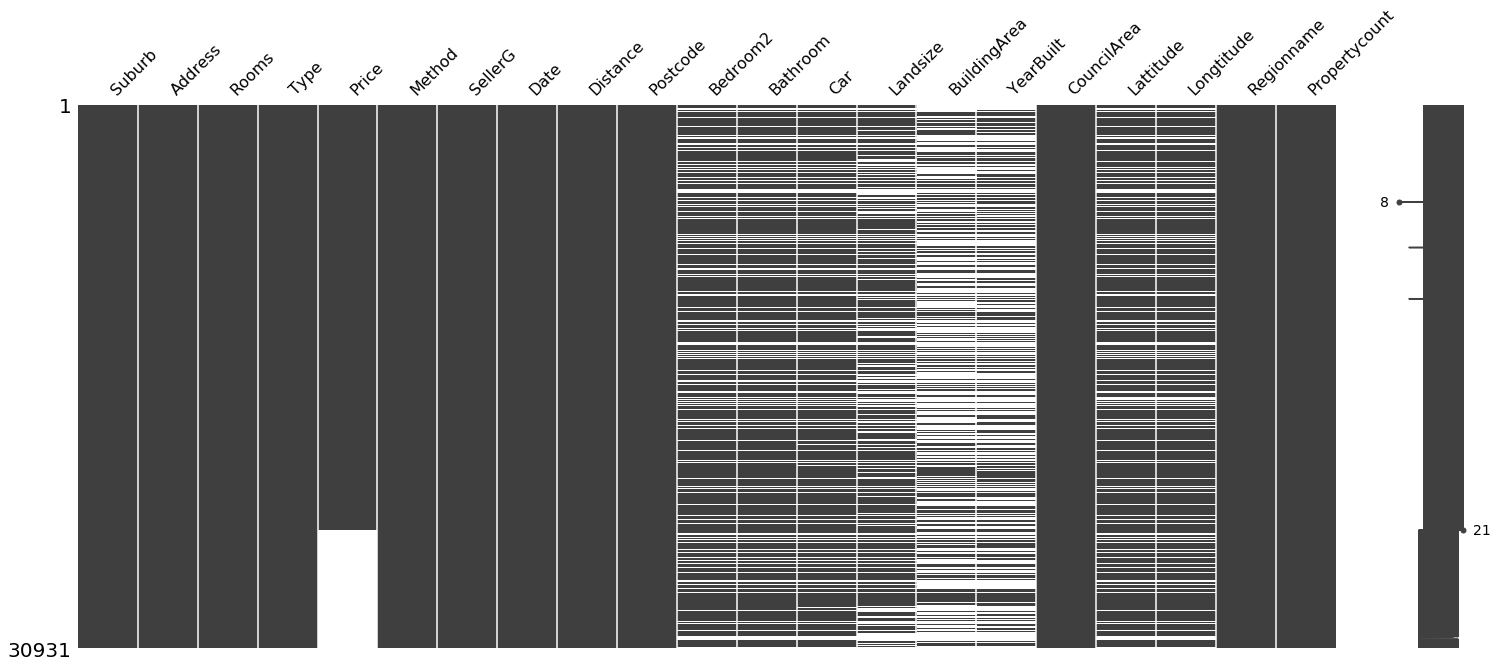

In [ ]:
mn.matrix(df.sort_values(by=["Price"]))

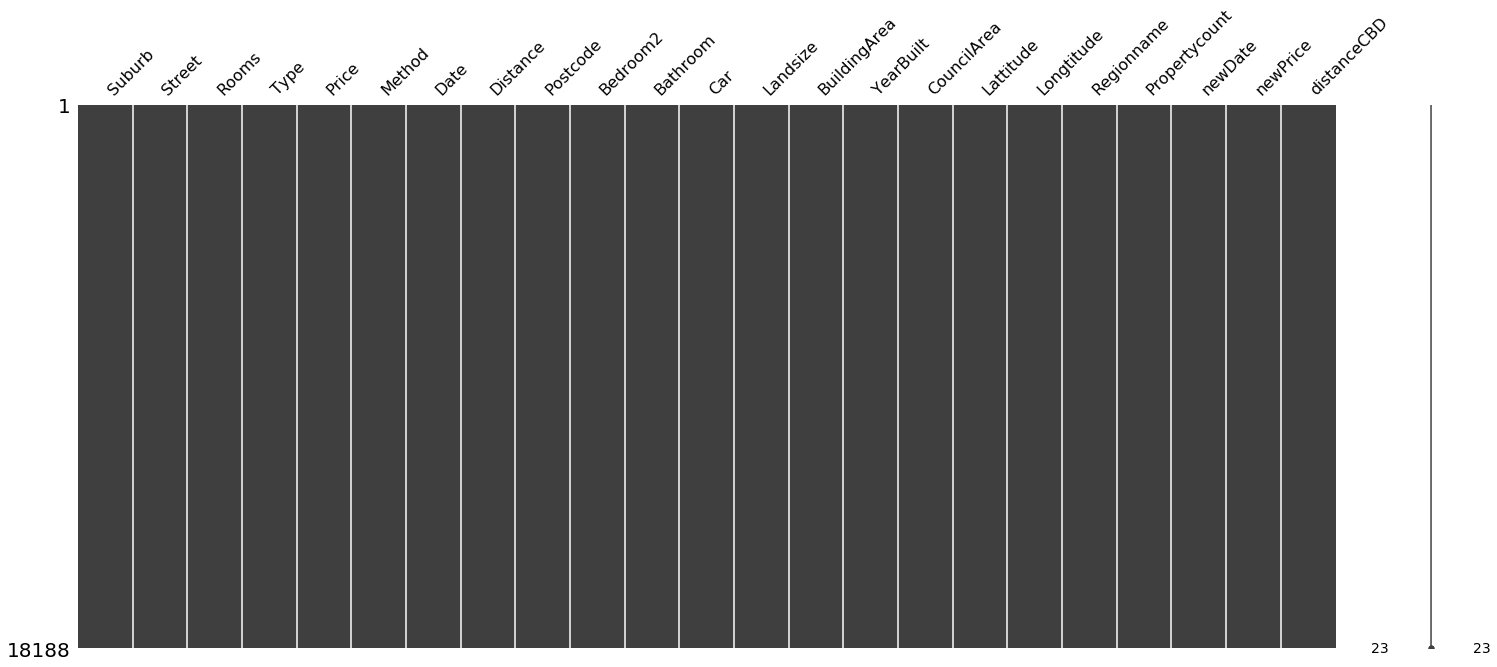

#### 3.1.2 Purchace Amount of Different House Types
Firstly, we want to demonstrate the real trend of the purchase amount based on different house types.

Type        h    t    u
newDate                
0         695   83  261
1        1901  239  801
2        1532  189  553
3        1663  196  555
4        3258  358  812
5        4442  265  384


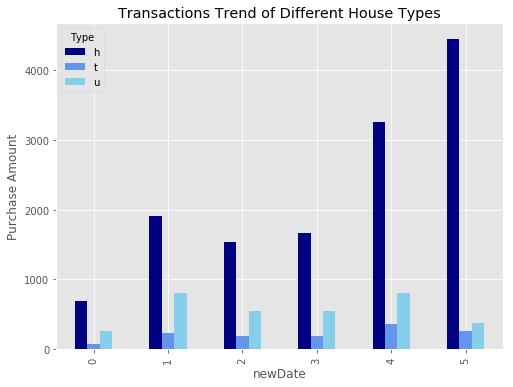

In [10]:
trend = pd.crosstab([df['newDate']],
                     df.Type.astype(object))
print(trend)

plt.style.use('ggplot')
trend.plot(kind='bar', stacked=False, figsize=(8,6), color=('navy','cornflowerblue','skyblue'))
plt.ylabel('Purchase Amount')
plt.title('Transactions Trend of Different House Types')
plt.show()

As we can observe, not all types of houses vary in the purchase amount. As time goes by, the purchase amount of houses, cottages and villa (the "h" type) increases sharply, but the purchase amount of units (the "u" type) and townhouses (the "t" type) maintain unchanged on the whole.
#### 3.1.3 Price Trend of Different House Types
As we find that not every type of houses varies in the purchase amount, we are strongly interested in price changes with time. We plot bar charts of the average purchase price of the three types of houses in different time ranges.

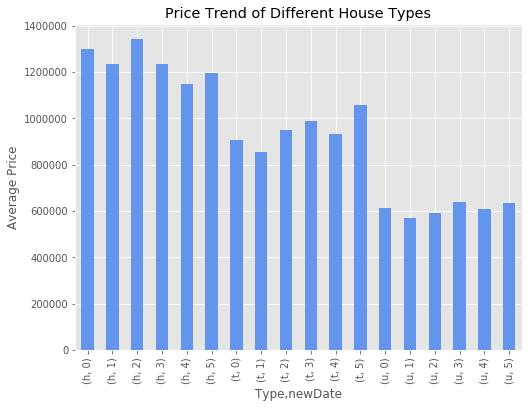

In [11]:
df_grouped1 = df.groupby(by=['Type','newDate'])
mean_price = df_grouped1.Price.mean()
ax = mean_price.plot(kind='bar',color='cornflowerblue', figsize=(8,6))
plt.ylabel('Average Price')
plt.title('Price Trend of Different House Types')
plt.show()

We can easily observe, with the time goes by, the price of houses, cottages and villa (the "h" type), whose purchase amount increase in the two years, goes stably, as well as units (the "u" type). However, the purchase amount of townhouses (the "t" type) increase in the two years.
#### 3.1.4 Purchse Amount of Different House Types in Different Price Ranges
In this part, we look forward to finding out the real situation, within which price range buyers of different house types reached the deal.

distanceCBD    False  True 
Type newPrice              
h    0            44    422
     1            72    872
     2           137   1006
     3           339    987
     4           558    798
     5           767    754
     6           857    758
     7           968    703
     8          1058    646
     9          1287    458
t    0            22     61
     1            64     67
     2            88     66
     3           107     77
     4           105     91
     5            91     77
     6            70     83
     7            70     59
     8            57     34
     9            15     26
u    0           938    319
     1           565    167
     2           368    150
     3           218    109
     4           158     89
     5            81     39
     6            53     16
     7            38     13
     8            26      5
     9            14      0


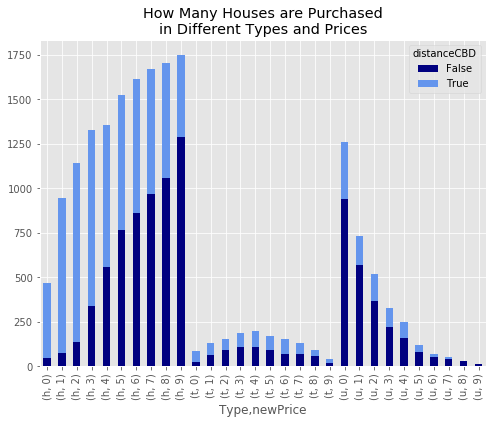

In [12]:
ditanceCBD = pd.crosstab([df['Type'],
                       df['newPrice']],
                       df.distanceCBD.astype(bool))

print(ditanceCBD)
ditanceCBD.plot(kind='bar', stacked=True, color=('navy','cornflowerblue'), figsize=(8,6))
plt.title('How Many Houses are Purchased\nin Different Types and Prices')
plt.show()

According to the plot above, most buyers of houses, cottages and villa (the "h" type) bought their houses in a relatively high price. Oppositely, buyers of units (the "u" type) mostly concluded the transaction in a relatively low price. In addition, most buyers of townhouses (the "t" type) reached their deals in the middle price range.
#### 3.1.5 The Rate of Purchased Houses near CBD in Different Types and Price Ranges
In the part above, we also show the relationship between houses near the central business district, CBD and those far away from CBD in different house types and prices. In order to better show the effect of the distance from CBD, we will visualize the rate of purchased houses near CBD based on the last part. ("False" in the attributes "distanceCBD" reffers to the houses near CBD.)

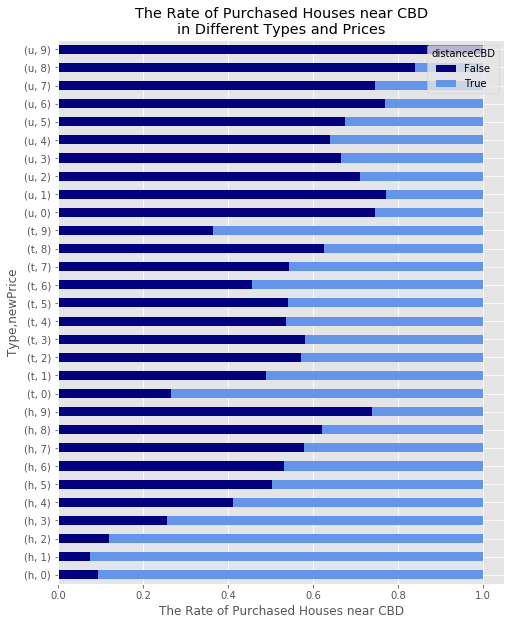

In [13]:
ditanceCBD_rate = ditanceCBD.div(ditanceCBD.sum(axis=1).astype(float), axis=0)
ditanceCBD_rate.plot(kind='barh', stacked=True, color=('navy','cornflowerblue'), figsize=(8,10))
plt.xlabel('The Rate of Purchased Houses near CBD')
plt.title('The Rate of Purchased Houses near CBD\nin Different Types and Prices')
plt.show()

From the plot, we can see most houses with a high price are near CBD, espacially for houses, cottages and villa (the "h" type) and units (the "u" type). However, the dictance from CBD has little effect on townhouses (the "t" type).
#### 3.1.6 Purchse Amount of Different House Types in Different Method
People buy houses by different methods. In Melbourne, which purchase method are the most popular one? We build the plot to show people's choices on house purchase methods.

Type       h    t     u
Method                 
PI      1505  161   394
S       9123  851  2004
SA        96   11    21
SP      1603  162   548
VB      1164  145   399


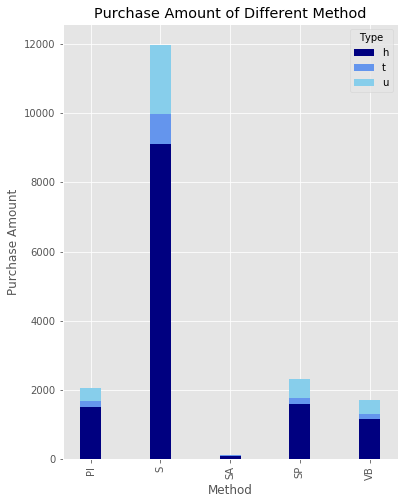

In [14]:
df_method = pd.crosstab([df['Method']],
                     df.Type.astype(object))
print(df_method)
df_method.plot(kind='bar', stacked=True, figsize=(6,8), color=('navy','cornflowerblue','skyblue'), width=0.3)
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount of Different Method')
plt.show()

In this plot, we can easily see that most buyers selected property sold (the "S" method), and few buyers selected sold after auction (the "SA" method).
### 3.2 Attribute Exploration

In [15]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### 3.2.1 Distribution of price

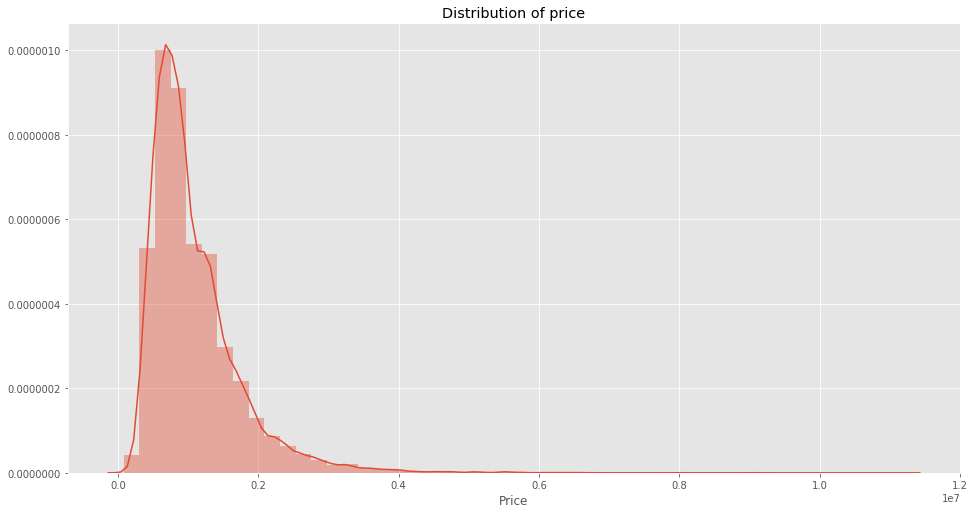

In [16]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16, 8.27))
sns.distplot(df['Price'])
plt.title('Distribution of price')
plt.show()

According to the KDE plot, the prices cluster in the range from the lowest price to 3e6 dollars. The price of dwellings which is around 1e6 dollars is the most acceptable for people.
#### 3.2.2 Distribution of type

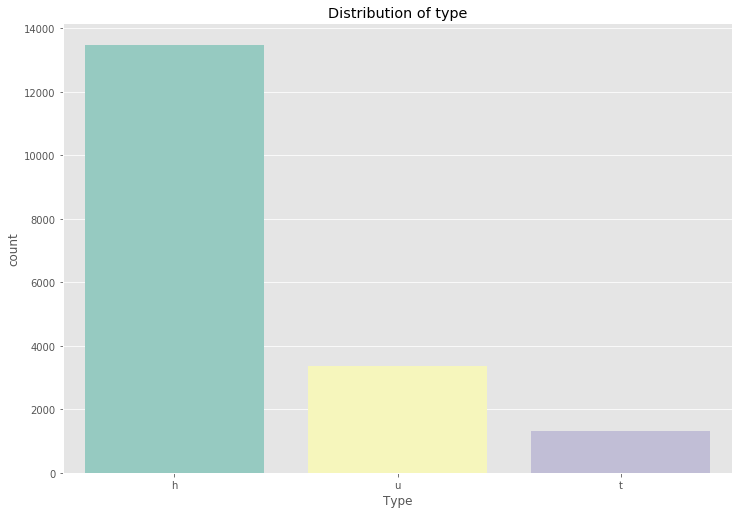

In [17]:
fig, ax = plt.subplots(figsize=(12, 8.27))
ax = sns.countplot(x="Type", data=df, palette="Set3")
plt.title('Distribution of type')
plt.show()

As we can see, near 14,000 dwellings are houses which occupies approximately 80% of the market.
#### 3.2.3 Method of each type of dwelling

Text(0.5,1,'Method of each type of dwelling')

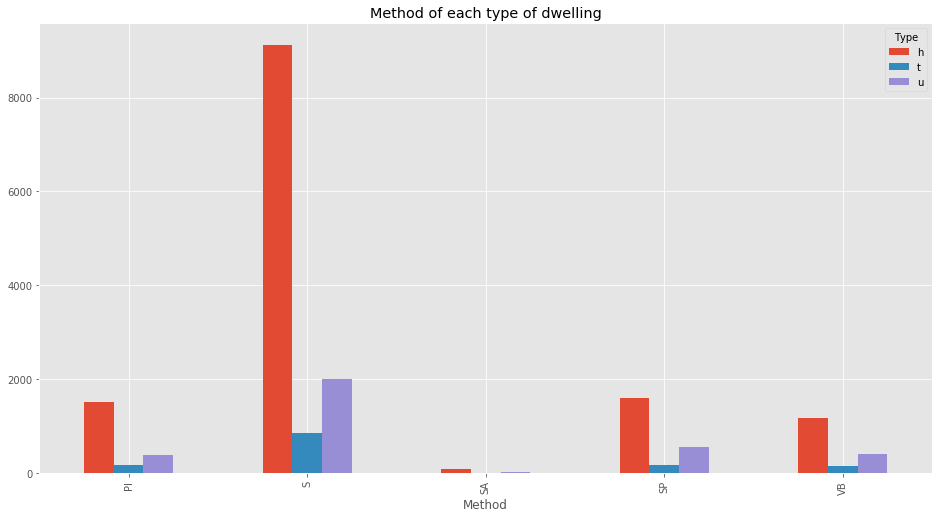

In [18]:
mtd = pd.crosstab([df['Method']],
                  df.Type.astype(object))
mtd.plot(kind='bar', stacked=False, figsize=(16,8.27))
plt.title('Method of each type of dwelling')

As we can see in the plot, a very large proportion of properties has been sold(method s), especially houses are very popular.
#### 3.2.4 Distribution of room

Text(0.5,1,'Distribution of room')

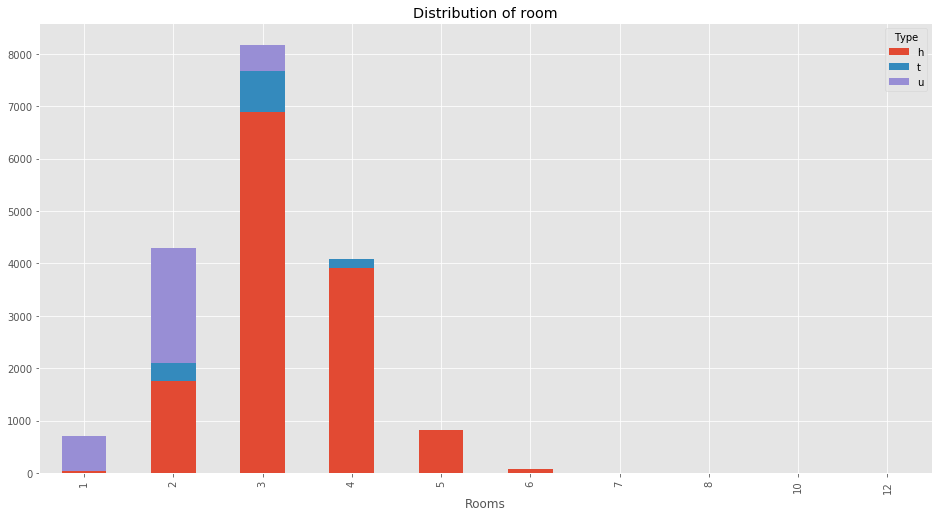

In [19]:
room = pd.crosstab([df['Rooms']],
                  df.Type.astype(object))
room.plot(kind='bar', stacked=True, figsize=(16,8.27))
plt.title('Distribution of room')

According to the plot, there could be 2-4 rooms in most properties. Houses usually have 3-4 rooms, whereas units have 1 or 2 rooms.
#### 3.2.5 Distribution of date

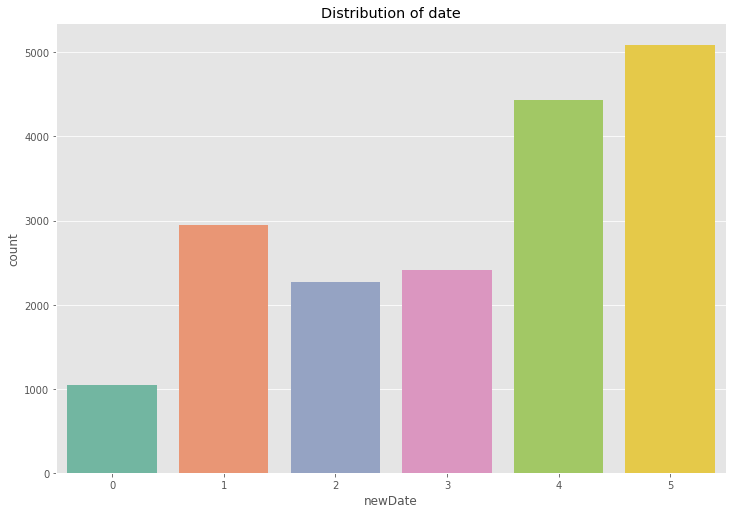

In [20]:
fig, ax = plt.subplots(figsize=(12, 8.27))
ax = sns.countplot(x="newDate", data=df, palette="Set2")
plt.title('Distribution of date')
plt.show()

The date range has been divided to 6 parts. According to the plot, the general trend is that the purchase amount is growing up.
### 3.3 Attribute relationship exploration
#### 3.3.1 Price of dwelling depending on the number of roomsand the distance from CBD

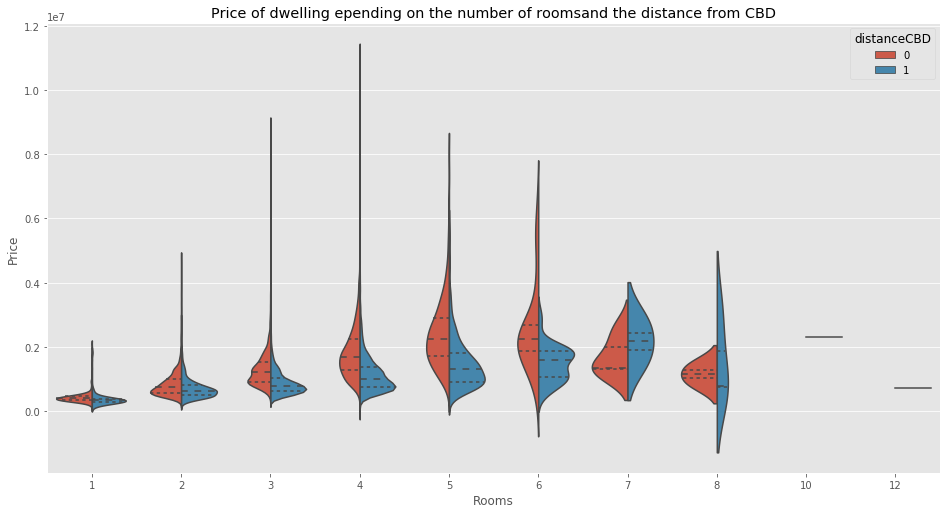

In [21]:
fig, ax = plt.subplots(figsize=(16, 8.27))
sns.violinplot(x="Rooms", y="Price", hue="distanceCBD", data=df, split=True, inner="quart");
plt.title('Price of dwelling epending on the number of roomsand the distance from CBD')
plt.show()

#### 3.3.2 Year of the dwellings built depending on the distance from CBD each price range

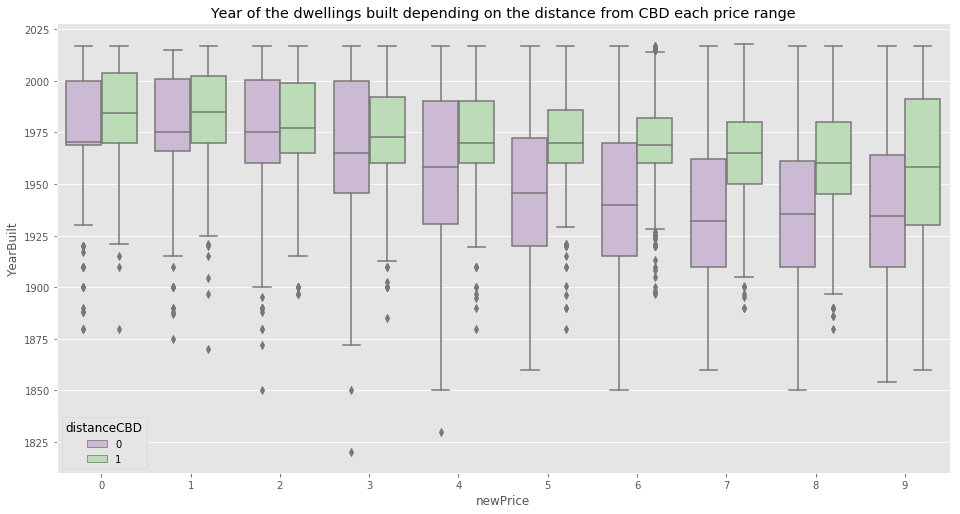

In [22]:
fig, ax = plt.subplots(figsize=(16, 8.27))
sns.boxplot(x='newPrice',y='YearBuilt',hue='distanceCBD',data=df, palette='PRGn')
plt.title('Year of the dwellings built depending on the distance from CBD each price range')
plt.show()

In this plot, we can tell that for the properties near CBD, the older the properties are, the more expensive they are. Also, for the properties in the same price range, the ones near CBD are generally older than the ones which are farther from CBD.
#### 3.3.3 Purchase amount in each region for each type of dwelling

Text(0.5,1,'Purchase amount in each region for each type of dwelling')

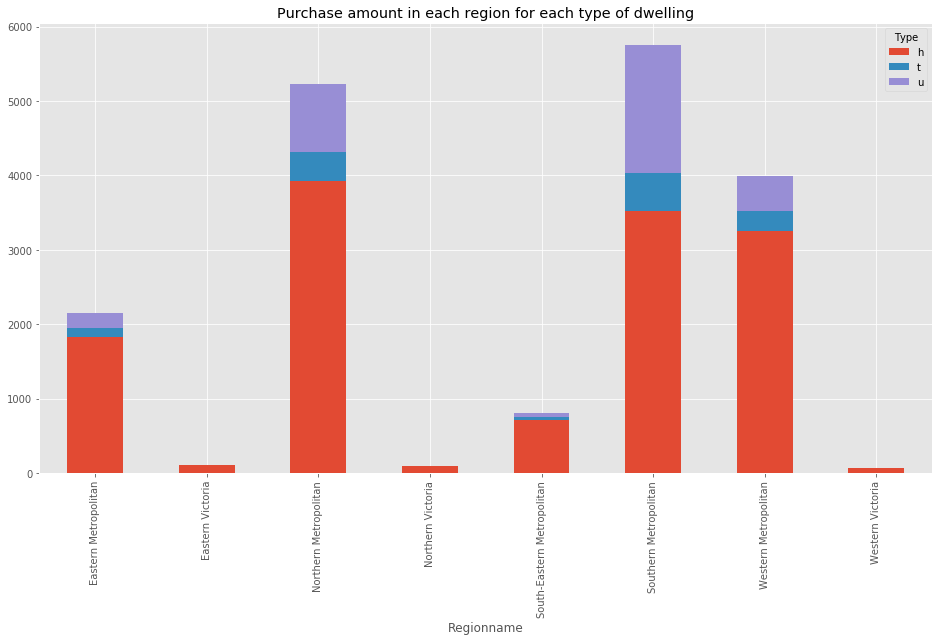

In [23]:
region = pd.crosstab([df['Regionname']],
                  df.Type.astype(object))
region.plot(kind='bar', stacked=True, figsize=(16,8.27))
plt.title('Purchase amount in each region for each type of dwelling')
#plt.show()

According the plot, most properties sold are in the area of Metropolitan, meanwhile the number of the properties in Victoria is genuinly small.
### 3.4 Relationship Exploration

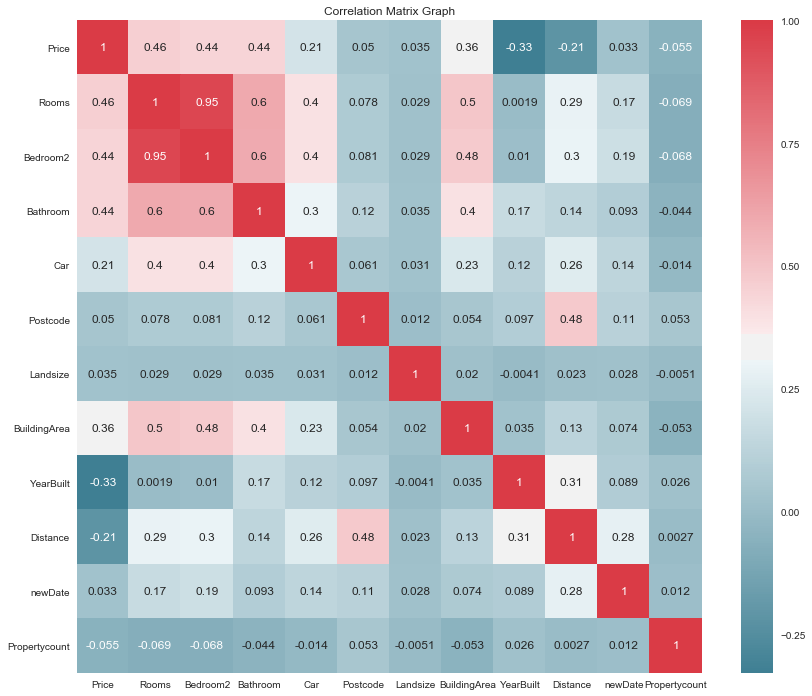

In [24]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(14, 12))
dre = df[['Price','Rooms','Bedroom2','Bathroom','Car','Postcode','Landsize','BuildingArea','YearBuilt','Distance','newDate','Propertycount']]
corr = dre.corr()
sns.heatmap(corr, cmap=cmap, annot=True)
plt.title('Correlation Matrix Graph')
plt.show()

According to the correlation table, "Price", "Rooms","Bedroom2","Car","BuildingArea","newDate" and "Bathroom" have positive correlation with each other. Through our table, we are focusing on Price, it shows that Price & Rooms and Price & BuildingArea have comparatively strong negative correlation with each other, that means the more space that house have, the higher Price customer pay. Price & Distance has negative correlation with each other, that means the closer the houses away from CBD, the higher Price the house costs.
### 3.5 Scatter Plots Except For Department

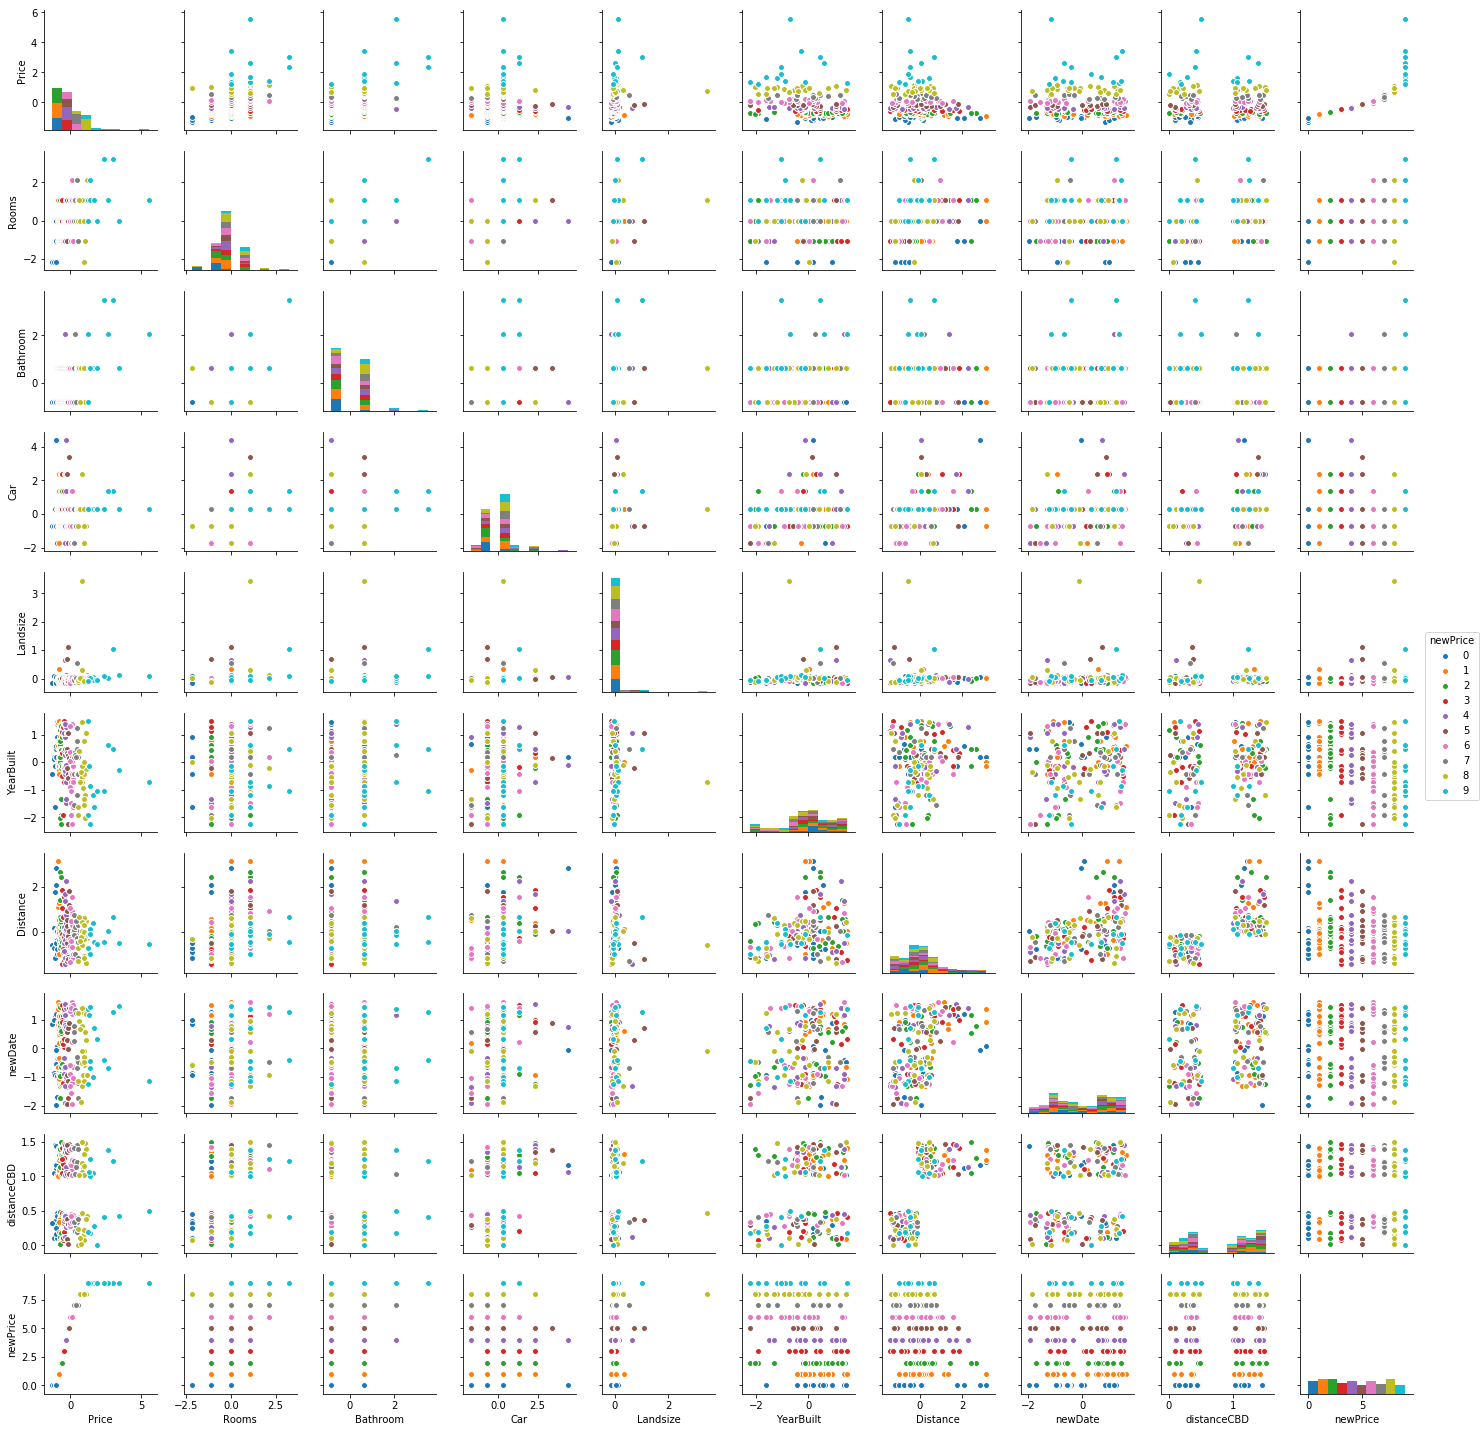

In [12]:
from sklearn import preprocessing
df_scale = df
df_scaled = df.copy()
df_scale[['Price','Rooms','Bathroom','Car','Landsize','YearBuilt','Distance','newDate']] = preprocessing.scale(df_scaled[['Price','Rooms','Bathroom','Car','Landsize','YearBuilt','Distance','newDate']])

df_sample = df_scale.sample(frac=0.01, replace=False)
df_sample_jitter = df_sample[['Price','Rooms','Bathroom','Car','Landsize','YearBuilt','Distance','newDate', 'distanceCBD','newPrice']]

df_sample_jitter[df.columns[[20,22]]] = df_sample_jitter[df.columns[[20,22]]].values + np.random.rand(len(df_sample_jitter),2)/2
sns.pairplot(df_sample_jitter, hue="newPrice", size=2)
plt.show()

## 4. Dimensionality Reduction

In [13]:
from sklearn.decomposition.pca import PCA
from sklearn import preprocessing
df = df.dropna(axis=0, how='any')
df_scaled = df.copy()
df_scaled[['Rooms','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','distanceCBD','newDate']] = preprocessing.scale(df_scaled[['Rooms','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','distanceCBD','newDate']])
for col in ['Suburb','Type','Method','Postcode','Propertycount']:
    if col in df_scaled:
        del df_scaled[col]
df_scaled=pd.DataFrame(df_scaled)
df_scaled.head()

,Street,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,newDate,newPrice,distanceCBD
1,Turner St,-1.099408,0.608968,3/12/16,-1.282467,-1.066226,-0.822670,-0.691253,-0.104982,-0.457569,-1.295644,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,-1.968441,8,-0.984559
2,Bloomburg St,-1.099408,-0.076521,4/2/16,-1.282467,-1.066226,-0.822670,-1.710194,-0.118499,-0.658179,-1.928392,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,-1.968441,5,-0.984559
4,Charles St,-0.019126,0.585862,4/3/17,-1.282467,-0.001439,0.621764,-1.710194,-0.124963,0.026594,-1.928392,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,-0.113453,8,-0.984559
5,Federation La,-0.019126,-0.361499,4/3/17,-1.282467,-0.001439,0.621764,-0.691253,-0.136717,-0.301325,1.193083,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,-0.113453,4,-0.984559
6,Park St,1.061155,0.793819,4/6/16,-1.282467,-0.001439,-0.822670,0.327689,-0.129077,-0.050563,1.493224,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,-1.968441,8,-0.984559


In [14]:
from sklearn.decomposition import PCA
X = df_scaled[['Rooms','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','distanceCBD','newDate']]
y = df['newPrice']
target_names='newPrice'
pca = PCA(n_components=4)
X_pca = pca.fit(X).transform(X)

print ('pca:', pca.components_)

pca: [[ 5.10004956e-01  5.09101478e-01  4.10796616e-01  3.17764610e-01
   3.06117912e-02  3.53148754e-01  9.47734598e-02  2.28907558e-01
   1.54759876e-01]
 [ 1.77972438e-01  1.64388125e-01  1.05904983e-01 -1.44004842e-01
   5.23690991e-04  2.02491235e-01 -6.60921204e-01 -5.68023818e-01
  -3.29967007e-01]
 [-1.75510486e-02 -1.31832391e-02 -4.79466326e-02  2.41396422e-02
   9.65732732e-01 -4.98737063e-02 -1.19402651e-01 -2.75858054e-02
   2.15618866e-01]
 [-5.41262633e-02 -7.13424201e-02  2.30867209e-01  3.96652327e-03
   2.52394871e-01  1.23160662e-01  4.47762065e-01 -7.42331801e-04
  -8.11974179e-01]]


In [ ]:
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:             
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-10])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, X) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_pca[np.abs(df_pca)>8] = np.sign(df_pca)*8 

import pandas.tools.plotting as scatter_plot

# scatter plot the output, with the names created from the weights
ax = df_pca.plot.scatter( x = pca_weight_strings[0],y = pca_weight_strings[1], c=y, s=10,figsize=(15, 10))
plt.show()

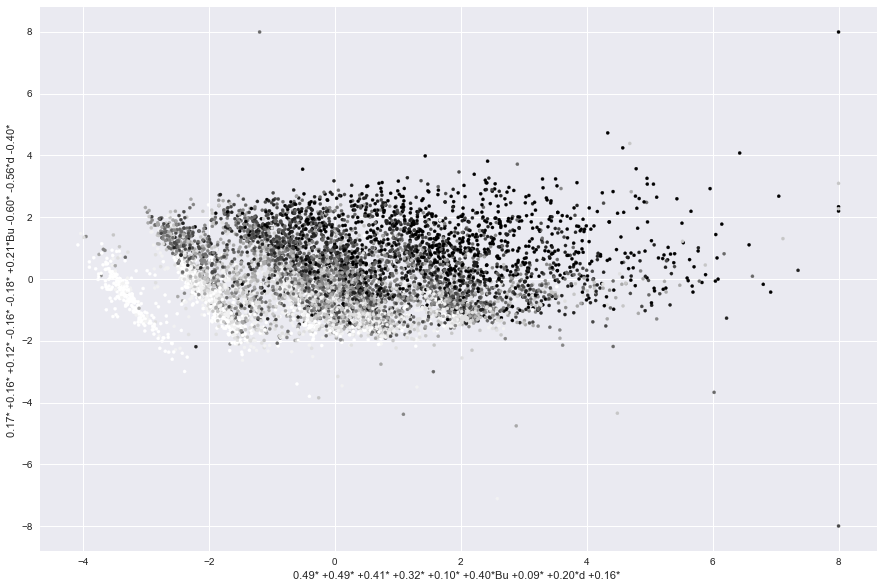

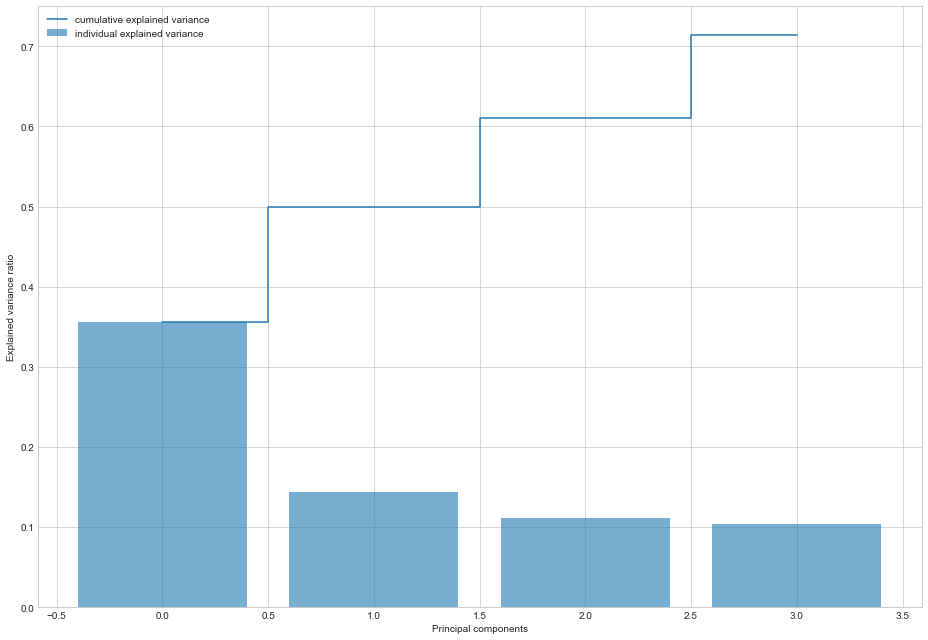

In [16]:
explained_var = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(explained_var)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(13, 9))

    plt.bar(range(4), explained_var, alpha=0.6, align='center', label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

The plot above clearly shows that most of the variance (38% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (15%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 53% of the information.

In [ ]:
df_sample = df_pca.sample(frac=0.4, replace=False)
y=y.dropna(axis=0, how='any')
ax = df_sample.plot.scatter(x=pca_weight_strings[0], y=pca_weight_strings[1], c=y[df_sample.index.values], s=10,figsize=(15, 10))
plt.show()

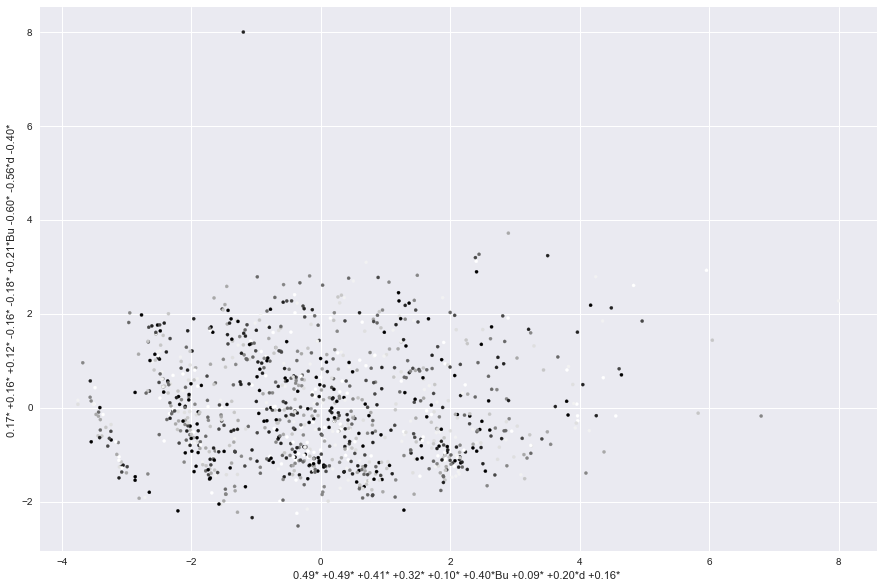

We randomly select 40% of our total instances to plot a scatter plot. We can see that the blue dots and pink dots overlap on top of each other, which is not what we expect.

## Refrence
[1] Markus K. Brunnermeier, Bubbles, 2008, New Palgrave Dictionary of Economics, Second Edition